<a href="https://colab.research.google.com/github/subhash505/new-repository/blob/master/question__estiamete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import random

In [3]:
import pandas as pd
import scipy.stats as stats

In [4]:
df=pd.read_csv(input())

/content/data/athletes.csv


In [5]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
df.shape

(11538, 11)

In [7]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [8]:
x=df[df['sex']=='female']

In [9]:
x.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0


In [10]:
x['weight'].mean()

62.64442668797443

In [11]:
x1=x.sample(frac=0.1)

In [12]:
x1.shape

(520, 11)

In [13]:
mean_sample=x1['weight'].mean()
print(mean_sample)

62.67065868263473


In [14]:
mean_hat_sample = []
for i in range(1000):
    sample = x.sample(frac=0.1)
    mean_sample = sample['weight'].mean()
    mean_hat_sample.append(mean_sample)

In [15]:
print(np.array(mean_hat_sample).mean())

62.64504366703256


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


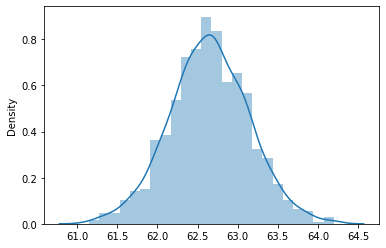

In [16]:
sns.distplot(mean_hat_sample)

In [17]:
std_hat = x1['weight'].std()/np.sqrt(len(x1))  #sigma
std_hat

0.4844531361102503

In [18]:
z=stats.norm.ppf(q = 0.975)
z

1.959963984540054

In [28]:
lower_limit = mean_sample - z*std_hat
upper_limit = mean_sample + z*std_hat

lower_limit, upper_limit

(62.26334070664892, 64.16236210459606)

In [29]:
x['weight'].mean()

62.64442668797443

In [33]:
freedom=len(x1) - 1
print(freedom)

519


In [31]:
tscore=stats.t.ppf(0.975, freedom)
tscore

1.9645453314967687

In [32]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= freedom,                    # Degrees of freedom
                 loc = mean_sample,         # Sample mean
                 scale = std_hat) 

(62.261121258748126, 64.16458155249684)